# Black-Scholes

In [2]:
import numpy as np, matplotlib.pyplot as plt 
from scipy.stats import norm

## Nomenclature

* $C$: Call option price.
* $S$: Current stock.
* $K$: Strike price.
* $t$: Time to maturity.
* $N$: Normal distribution CDF.

* $r$: Risk-free interest rate.
* $\sigma$: Volatility.



## Black-Scholes Formula


$C = SN(d_1) - K\exp^{-rt}N(d_2)$

$d_1 = \dfrac{\log{(S/K)} + (r + \sigma^2/2)t}{\sigma\sqrt{t}}$

$d_2 = d_1 - \sigma \sqrt{t}$

## Black-Scholes Class Definition
* Each class object is to be initialized with specific $r$ and $K$.
* Class accepts fixed maturity $t$ and variable stock price $S$, or vice-versa.
* It also accepts both $t$ and $S$ as variables along a spanning range.
* Methods `calculate_x` return `x`, where `x` is either `d1`, `d2` or call option price `C`.
* `C` has shape `(len(S), len(t))`.
* Normal function given by scipy's normal CDF.

In [3]:
class black_scholes():

    def __init__(self, S:list[float] = [], K:float = 50., r:float = 0.05, sigma_v:float = 0.2, t:list[float] = [1]):
        
        if len(S) == 0:
            print("Provide S as an array of floats.")
            return
        
        self.S = np.array(S)
        self.K = K
        self.r = r
        self.t = np.array(t)
        self.S_2d, self.t_2d = np.meshgrid(self.S, self.t)
        self.sigma_v = sigma_v
        
        self.N = norm.cdf
        self.d1 = []
        self.d2 = []
        
    def calculate_d1(self) -> list[float]:
        self.d1 = (np.log(self.S_2d/self.K) + (self.r + (self.sigma_v**2)*0.5)*self.t_2d)/self.sigma_v/np.sqrt(self.t_2d)
        return self.d1
        
    def calculate_d2(self) -> list[float]:
        self.d2 = self.d1 - self.sigma_v*np.sqrt(self.t)
        return self.d2
        
    def calculate_C(self) -> list[float]:
        if len(self.d1) == 0: self.calculate_d1()
        if len(self.d2) == 0: self.calculate_d2()
        self.C = self.S*self.N(self.d1) - self.K*np.exp(-1.*self.r*self.t)*self.N(self.d2)
        return self.C

        

In [6]:
SIZE_DEFAULT = 14
SIZE_LARGE = 18
plt.rc("font",  family="Liberation Sans")
plt.rc("font",  weight="normal")
plt.rc("font",  size=SIZE_DEFAULT)  
plt.rc("axes",  titlesize=SIZE_LARGE)  
plt.rc("axes",  labelsize=SIZE_LARGE)  
plt.rc("xtick", labelsize=SIZE_DEFAULT)  
plt.rc("ytick", labelsize=SIZE_DEFAULT)  

In [7]:
model_bsm = black_scholes(K=100, S = np.linspace(50,150,100))
model_bsm.calculate_C()

array([[2.39941755e-03, 3.50136663e-03, 5.02825785e-03, 7.11216809e-03,
        9.91572176e-03, 1.36363047e-02, 1.85102318e-02, 2.48167355e-02,
        3.28816325e-02, 4.30805288e-02, 5.58414225e-02, 7.16465798e-02,
        9.10335712e-02, 1.14595379e-01, 1.42979509e-01, 1.76886075e-01,
        2.17064841e-01, 2.64311245e-01, 3.19461462e-01, 3.83386577e-01,
        4.56985968e-01, 5.41180029e-01, 6.36902364e-01, 7.45091603e-01,
        8.66682997e-01, 1.00259995e+00, 1.15374562e+00, 1.32099479e+00,
        1.50518608e+00, 1.70711468e+00, 1.92752565e+00, 2.16710793e+00,
        2.42648914e+00, 2.70623118e+00, 3.00682662e+00, 3.32869603e+00,
        3.67218618e+00, 4.03756899e+00, 4.42504141e+00, 4.83472596e+00,
        5.26667210e+00, 5.72085816e+00, 6.19719389e+00, 6.69552357e+00,
        7.21562948e+00, 7.75723583e+00, 8.32001290e+00, 8.90358143e+00,
        9.50751724e+00, 1.01313558e+01, 1.07745969e+01, 1.14367095e+01,
        1.21171358e+01, 1.28152963e+01, 1.35305938e+01, 1.426241

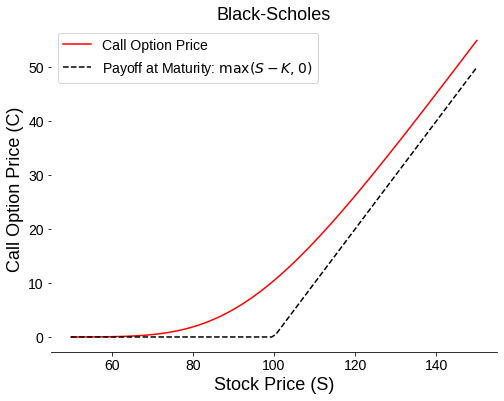

In [14]:
model_bsm = black_scholes(K=100, S = np.linspace(50,150,100))
model_bsm.calculate_C()

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 6))
ax.plot(model_bsm.S, model_bsm.C[-1], label='Call Option Price', color='red')
ax.plot(model_bsm.S, np.maximum(model_bsm.S - model_bsm.K, 0), label='Payoff at Maturity: '+r'$\max(S-K,0)$', linestyle='--', color='black')
ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Call Option Price (C)')
ax.set_title('Black-Scholes')
# ax.set_xlim([model_bsm.S[0], model_bsm.S[-1]])

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend()
plt.show()

In [25]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 6))
ax.plot(model_bsm.d1, model_bsm.S*, label='Call Option Price', color='red')
# ax.plot(model_bsm.S, np.maximum(model_bsm.S - model_bsm.K, 0), label='Payoff at Maturity: '+r'$\max(S-K,0)$', linestyle='--', color='black')

[-3.1157359  -3.01573257 -2.91769021 -2.8215334  -2.72719098 -2.63459574
 -2.54368415 -2.45439606 -2.36667451 -2.28046548 -2.19571769 -2.11238243
 -2.03041338 -1.94976647 -1.87039972 -1.79227313 -1.71534854 -1.63958951
 -1.56496126 -1.49143052 -1.41896549 -1.3475357  -1.277112   -1.20766644
 -1.13917222 -1.07160362 -1.00493597 -0.93914555 -0.87420957 -0.81010613
 -0.74681414 -0.68431333 -0.62258415 -0.56160778 -0.50136609 -0.44184158
 -0.38301737 -0.32487718 -0.26740528 -0.21058649 -0.15440612 -0.09885
 -0.04390439  0.01044397  0.06420793  0.11739992  0.17003199  0.22211579
  0.27366264  0.32468349  0.37518897  0.42518939  0.47469474  0.52371474
  0.57225881  0.62033611  0.66795551  0.71512568  0.76185499  0.80815161
  0.8540235   0.89947835  0.9445237   0.98916686  1.03341493  1.07727486
  1.1207534   1.16385711  1.20659242  1.24896555  1.29098261  1.33264951
  1.37397206  1.4149559   1.45560653  1.49592933  1.53592954  1.57561229
  1.61498257  1.65404527  1.69280516  1.73126688  1.76

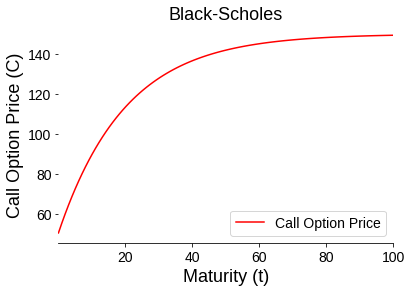

In [11]:
model_bsm = black_scholes(K=100, S = [150], t = np.linspace(0.1,100,100))
model_bsm.calculate_C()

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 4))
ax.plot(model_bsm.t, model_bsm.C[-1], label='Call Option Price', color='red')
# ax.plot(model_bsm.t, np.maximum(model_bsm.S - model.K, 0), label='Payoff at Maturity', linestyle='--', color='black')
ax.set_xlabel('Maturity (t)')
ax.set_ylabel('Call Option Price (C)')
ax.set_title('Black-Scholes')
ax.set_xlim([model_bsm.t[0], model_bsm.t[-1]])

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend()
plt.show()

## 3D Plots

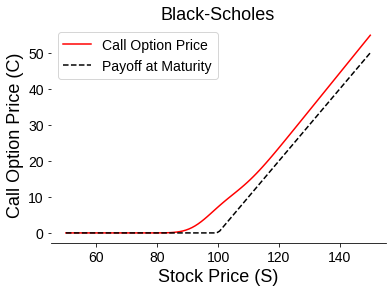

In [43]:
model_bsm = black_scholes(K=100, S = np.linspace(50,150,100), t = np.linspace(0.1,1,100))
model_bsm.calculate_C()

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 4))
ax.plot(model_bsm.S, model_bsm.C[0], label='Call Option Price', color='red')
ax.plot(model_bsm.S, np.maximum(model_bsm.S - model_bsm.K, 0), label='Payoff at Maturity', linestyle='--', color='black')
ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Call Option Price (C)')
ax.set_title('Black-Scholes')
# ax.set_xlim([model_bsm.S[0], model_bsm.S[-1]])

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend()
plt.show()

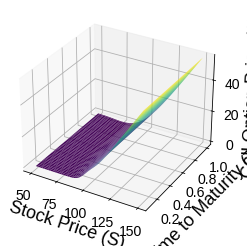

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(model_bsm.S_2d, model_bsm.t_2d, model_bsm.C, cmap='viridis', edgecolor='none')
ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Time to Maturity (T)')
ax.set_zlabel('Call Option Price (C)')
# ax.view_init(0, 45, 90)
plt.savefig("./test3d.png")
plt.show()

$C = SN(d_1) - K\exp^{-rt}N(d_2)$

$d_1 = \dfrac{\log{(S/K)} + (r + \sigma^2/2)t}{\sigma\sqrt{t}}$

$d_2 = d_1 - \sigma \sqrt{t}$

In [40]:
model_bsm.t

array([1])

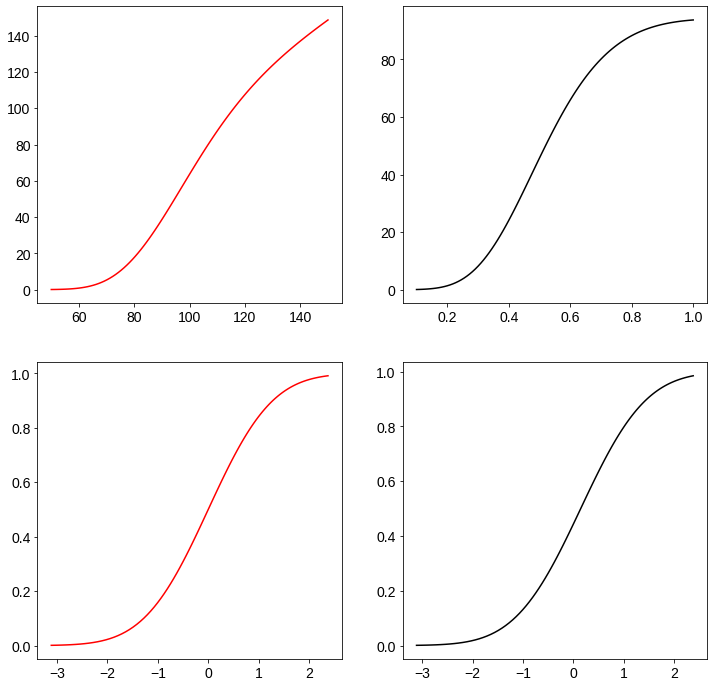

In [49]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
ax0.plot(model_bsm.S, model_bsm.S*model_bsm.N(model_bsm.d1[-1]), label='Standard Normal CDF', color='red')
ax1.plot(model_bsm.t, model_bsm.K*np.exp(-1.*model_bsm.r*model_bsm.t)*model_bsm.N(model_bsm.d2[-1]), label='Standard Normal CDF', color='black')
ax2.plot(model_bsm.d1[-1], model_bsm.N(model_bsm.d1[-1]), label='Standard Normal CDF', color='red')
ax3.plot(model_bsm.d1[-1], model_bsm.N(model_bsm.d2[-1]), label='Standard Normal CDF', color='black')